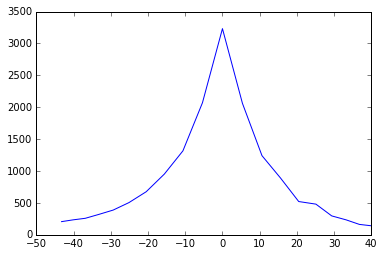

In [57]:
import matplotlib.pyplot as plt
import numpy as np
#prepare dataset
T = np.array([39.999999000288184, 36.821427596336214, 33.249999052569976, 29.374999082583599, 25.124999115501751, 20.499999151324474, 15.624999189083553, 10.624999227810804, 5.3749992684744115, -6.8989378121386835e-07, -5.3750006482619881, -10.625000607598366, -15.62500056887113, -20.500000531112036, -25.125000495289342, -29.375000462371162, -33.250000432357567, -36.8750004042803, -40.125000379107576, -43.250000354903051])
power = np.array([141.61387434554973, 162.87969924812029, 234.27017543859645, 296.31263157894739, 480.87120418848173, 521.59499759499772, 889.12870855148356, 1241.1795212765958, 2061.0631578947368, 3232.84252919855, 2070.6701940035273, 1316.3826352530541, 951.96247818499126, 675.30029013539649, 505.26223404255325, 387.73121693121686, 319.44791666666674, 258.73537234042556, 234.61236702127658, 206.44586466165416])


plt.plot(T,power)
plt.show()

[  3.99999990e+01   3.68214276e+01   3.32499991e+01   2.93749991e+01
   2.51249991e+01   2.04999992e+01   1.56249992e+01   1.06249992e+01
   5.37499927e+00  -6.89893781e-07  -5.37500065e+00  -1.06250006e+01
  -1.56250006e+01  -2.05000005e+01  -2.51250005e+01  -2.93750005e+01
  -3.32500004e+01  -3.68750004e+01  -4.01250004e+01  -4.32500004e+01]


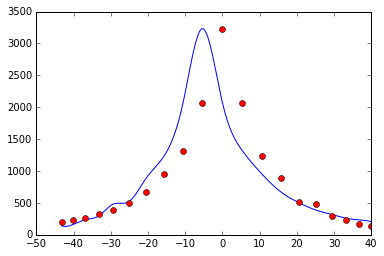

In [58]:
from scipy.interpolate import spline
#method 1, somehow strange

Q=sorted(T)
xnew=np.arange(x.min(),x.max(),0.1) 
power_smooth = spline(Q,power,xnew)
plt.plot(xnew,power_smooth, T,power,'ro')
print(T)
plt.show()

(array([  141.61387435,   162.87969925,   234.27017544,   296.31263158,
         480.87120419,   521.59499759,   889.12870855,  1241.17952128,
        2061.06315789,  3232.8425292 ,  2070.670194  ,  1316.38263525,
         951.96247818,   675.30029014,   505.26223404,   387.73121693,
         319.44791667,   258.73537234,   234.61236702,   206.44586466]), array([  206.44586466,   234.61236702,   258.73537234,   319.44791667,
         387.73121693,   505.26223404,   675.30029014,   951.96247818,
        1316.38263525,  2070.670194  ,  3232.8425292 ,  2061.06315789,
        1241.17952128,   889.12870855,   521.59499759,   480.87120419,
         296.31263158,   234.27017544,   162.87969925,   141.61387435]), [141.61387434554973, 162.87969924812029, 206.44586466165416, 234.27017543859645, 234.61236702127658, 258.73537234042556, 296.31263157894739, 319.44791666666674, 387.73121693121686, 480.87120418848173, 505.26223404255325, 521.59499759499772, 675.30029013539649, 889.12870855148356, 951.

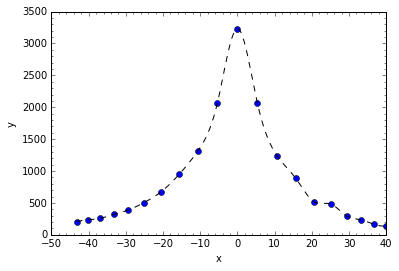

In [1]:
import scipy.interpolate as inter
import numpy as np
import pylab as plt

#method 2, worked!

x = np.array([39.999999000288184, 36.821427596336214, 33.249999052569976, 29.374999082583599, 25.124999115501751, 20.499999151324474, 15.624999189083553, 10.624999227810804, 5.3749992684744115, -6.8989378121386835e-07, -5.3750006482619881, -10.625000607598366, -15.62500056887113, -20.500000531112036, -25.125000495289342, -29.375000462371162, -33.250000432357567, -36.8750004042803, -40.125000379107576, -43.250000354903051])
y = np.array([141.61387434554973, 162.87969924812029, 234.27017543859645, 296.31263157894739, 480.87120418848173, 521.59499759499772, 889.12870855148356, 1241.1795212765958, 2061.0631578947368, 3232.84252919855, 2070.6701940035273, 1316.3826352530541, 951.96247818499126, 675.30029013539649, 505.26223404255325, 387.73121693121686, 319.44791666666674, 258.73537234042556, 234.61236702127658, 206.44586466165416])
xx = np.arange(x.min(),x.max(),0.1)
s1 = inter.InterpolatedUnivariateSpline (x, y)
s1rev = inter.InterpolatedUnivariateSpline (sorted(x), y[::-1])
# Use a smallish value for s
s2 = inter.UnivariateSpline (x[::-1], y[::-1], s=0.1)
s2crazy = inter.UnivariateSpline (x[::-1], y[::-1], s=5e8)
plt.plot (x, y, 'bo', label='Data')
# plt.plot (xx, s1(xx), 'k-', label='Spline, wrong order')
print(y,y[::-1],sorted(y))
plt.plot (xx, s1rev(xx), 'k--', label='Spline, correct order')
# plt.plot (xx, s2(xx), 'r-', label='Spline, fit')
# Uncomment to get the poor fit.
#plt.plot (xx, s2crazy(xx), 'r--', label='Spline, fit, s=5e8')
plt.minorticks_on()
# plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()